# Frequent Itemset

In [2]:
import sqlite3
import pyodbc
import pandas as pd
import numpy as np
from collections import defaultdict
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
DB = {
    'servername': 'tcp:dwhunitedoutdoors.database.windows.net,1433',
    'database': 'DWH_United_Outdoors',
    'username': 'onderzoeker',
    'password': 'Wachtwoord1.' 
}

conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=' + DB['servername'] + ';'
    'DATABASE=' + DB['database'] + ';'
    'UID=' + DB['username'] + ';'
    'PWD=' + DB['password'] + ';'
    'Encrypt=yes;'
    'TrustServerCertificate=no;'
    'Connection Timeout=30;'
)

dwh_conn = pyodbc.connect(conn_str)
dwh_cursor = dwh_conn.cursor()
dwh_cursor 

In [4]:
DB = {'servername':'-PC\\SQLEXPRESS', 'database':'Northwind'}

export_conn = pyodbc.connect('DRIVER={SQL SERVER};SERVER='+ DB['servername']+ ';DATABASE='+ DB['database']+ ';Trusted_Connection=yes')
export_cursor = export_conn.cursor()
export_cursor

merge va de bestelling tabellen 

In [5]:
query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"

# Voer de query uit
dwh_cursor.execute(query)

# Haal de resultaten op en print de tabelnamen
tables = dwh_cursor.fetchall()
for table in tables:
    print(table.TABLE_NAME)

Sales_SalesTerritory
Sales_SpecialOffer
Sales_SpecialOfferProduct
Sales_SalesReason
Sales_SalesTaxRate
Sales_CountryRegionCurrency
Sales_Currency
Sales_CurrencyRate
HumanResources_Shift
Person_StateProvince
Person_CountryRegion
PRODUCT
Shippers
EmployeeTerritories
Categories
PURCHASE
PRODUCTVENDOR
PRODUCTINVENTORY
PRODUCTIONLOCATION
WORKORDER
BILLOFMATERIALS
table_test
DATE
Sales_Store
Employees_Territories
OrderDetails
Region
Territories
Combined_Product
Combined_Customer
Combined_Employee
Bonus
Department
Sales_Order_Item
Sales_Order


In [6]:
def read_data_from_DWH(table_name):
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql(query, dwh_conn)

def read_data_from_Northwind(table_name):
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql(query, export_conn)

# Read data from DWH tables
df_WORKORDER = read_data_from_DWH('WORKORDER')
df_Purchases = read_data_from_DWH('PURCHASE')
df_orders = read_data_from_Northwind('Orders')
df_ordersDetails = read_data_from_DWH('OrderDetails')
df_products = read_data_from_DWH('Combined_Product')


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11268\1355531618.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, dwh_conn)
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11268\1355531618.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, export_conn)


In [7]:
df_orders = pd.merge(df_orders, df_ordersDetails)
df_orders

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ProductID,UnitPrice,Quantity,Discount
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,11,14.00,12,0.00
1,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,42,9.80,10,0.00
2,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,72,34.80,5,0.00
3,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,14,18.60,9,0.00
4,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,51,42.40,40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,RATTC,1,1998-05-06,1998-06-03,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,64,33.25,2,0.03
2151,11077,RATTC,1,1998-05-06,1998-06-03,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,66,17.00,1,0.00
2152,11077,RATTC,1,1998-05-06,1998-06-03,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,73,15.00,2,0.01
2153,11077,RATTC,1,1998-05-06,1998-06-03,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,75,7.75,4,0.00


In [8]:
# 1. Groepeer de data per WORKORDER_id en zet de producten om in lijsten
grouped = df_WORKORDER.groupby('WORKORDER_id')['WORKORDER_product_id'].apply(list).reset_index()

# 2. Controleer de gegroepeerde data
print(grouped.head())

transactions = grouped['WORKORDER_product_id'].tolist()
print("\nTransactions:")
print(transactions)

# 3. Encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Function to find the best threshold
def find_best_threshold(encoded_df, thresholds, minconf_threshold=0.7):
    best_threshold = None
    best_itemsets = None
    best_rules = None
    
    for threshold in thresholds:
        frequent_itemsets = apriori(encoded_df, min_support=threshold, use_colnames=True)
        if not frequent_itemsets.empty:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minconf_threshold)
            if not rules.empty:
                best_threshold = threshold
                best_itemsets = frequent_itemsets
                best_rules = rules
                break  # Stop at the first successful threshold
                
    return best_threshold, best_itemsets, best_rules

# Define the range of support thresholds to check
support_thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]

# Find the best threshold
best_threshold, best_itemsets, best_rules = find_best_threshold(df_encoded, support_thresholds)

# 4. Print the results
if best_threshold is not None:
    print(f"\nBest Support Threshold: {best_threshold}")
    print("\nFrequent Itemsets:")
    print(best_itemsets)
    print("\nAssociation Rules:")
    print(best_rules)
else:
    print("\nNo frequent itemsets found with the given support thresholds.")


   WORKORDER_id            WORKORDER_product_id
0            13  [747, 747, 747, 747, 747, 747]
1            14  [748, 748, 748, 748, 748, 748]
2            15                           [749]
3            16                           [753]
4            17                           [754]

Transactions:
[[747, 747, 747, 747, 747, 747], [748, 748, 748, 748, 748, 748], [749], [753], [754], [755], [756], [758], [760], [761], [762], [763], [764], [765], [766], [767], [768], [770], [771], [772], [773], [774], [775], [776], [777], [778], [516, 516], [517, 517], [518, 518], [519, 519], [747, 747, 747, 747, 747, 747], [748, 748, 748, 748, 748, 748], [806], [807], [810, 810, 810], [811, 811, 811], [812, 812, 812], [813, 813, 813], [817], [818], [819], [820], [825], [826], [827], [828], [894], [945, 945], [950], [951], [994], [995], [996], [802, 802], [803, 803], [804, 804], [749], [750], [771], [778], [516, 516], [519, 519], [748, 748, 748, 748, 748, 748], [807], [810, 810, 810], [813, 813, 813],

In [20]:

grouped = df_Purchases.groupby('PURCHASE_id')['PURCHASE_product_id'].apply(list).reset_index()

# 2. Check the grouped data
print(grouped.head())

transactions = grouped['PURCHASE_product_id'].tolist()
print("\nTransactions:")
print(transactions)

# 3. Encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Function to find the best threshold
def find_best_threshold(encoded_df, thresholds, minconf_threshold=0.7):
    best_threshold = None
    best_itemsets = None
    best_rules = None
    
    for threshold in thresholds:
        frequent_itemsets = apriori(encoded_df, min_support=threshold, use_colnames=True)
        if not frequent_itemsets.empty:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minconf_threshold)
            if not rules.empty:
                best_threshold = threshold
                best_itemsets = frequent_itemsets
                best_rules = rules
                break  # Stop at the first successful threshold
                
    return best_threshold, best_itemsets, best_rules

# Define the range of support thresholds to check
support_thresholds = [0.02,0.03, 0.04, 0.05, 0.06, 0.07, 0.08]

# Find the best threshold
best_threshold, best_itemsets, best_rules = find_best_threshold(df_encoded, support_thresholds)

# 4. Print the results
if best_threshold is not None:
    print(f"\nBest Support Threshold: {best_threshold}")
    print("\nFrequent Itemsets:")
    print(best_itemsets)
    print("\nAssociation Rules:")
    print(best_rules)
else:
    print("\nNo frequent itemsets found with the given support thresholds.")


   PURCHASE_id PURCHASE_product_id
0            1                 [1]
1            2          [359, 360]
2            3               [530]
3            4                 [4]
4            5               [512]

Transactions:
[[1], [359, 360], [530], [4], [512], [513], [317, 318, 319], [403, 404, 405, 406, 407], [422, 423, 424, 425, 426], [320, 321, 322], [438, 439, 440, 441], [941], [320, 321, 322], [504], [497], [323], [523, 524], [492, 493, 494, 495, 496], [908, 909, 910, 911, 912], [506], [351, 352, 679], [507, 508], [355, 940, 535], [351, 352], [507, 508], [491], [341, 342, 343, 344, 345, 346], [935, 936], [375, 376, 377, 378, 379], [476, 477, 478], [402], [510, 511], [403, 404, 405], [525], [526], [908, 909, 913], [356, 357], [935, 936], [524], [911, 912], [910], [937], [463, 464, 465], [462], [510, 511], [527], [938, 939, 509], [492, 493, 494, 495, 496], [523], [422, 423, 424], [490, 491], [528], [505], [938, 939], [358], [375, 376, 377, 378], [356, 357], [375, 376, 377, 378, 379

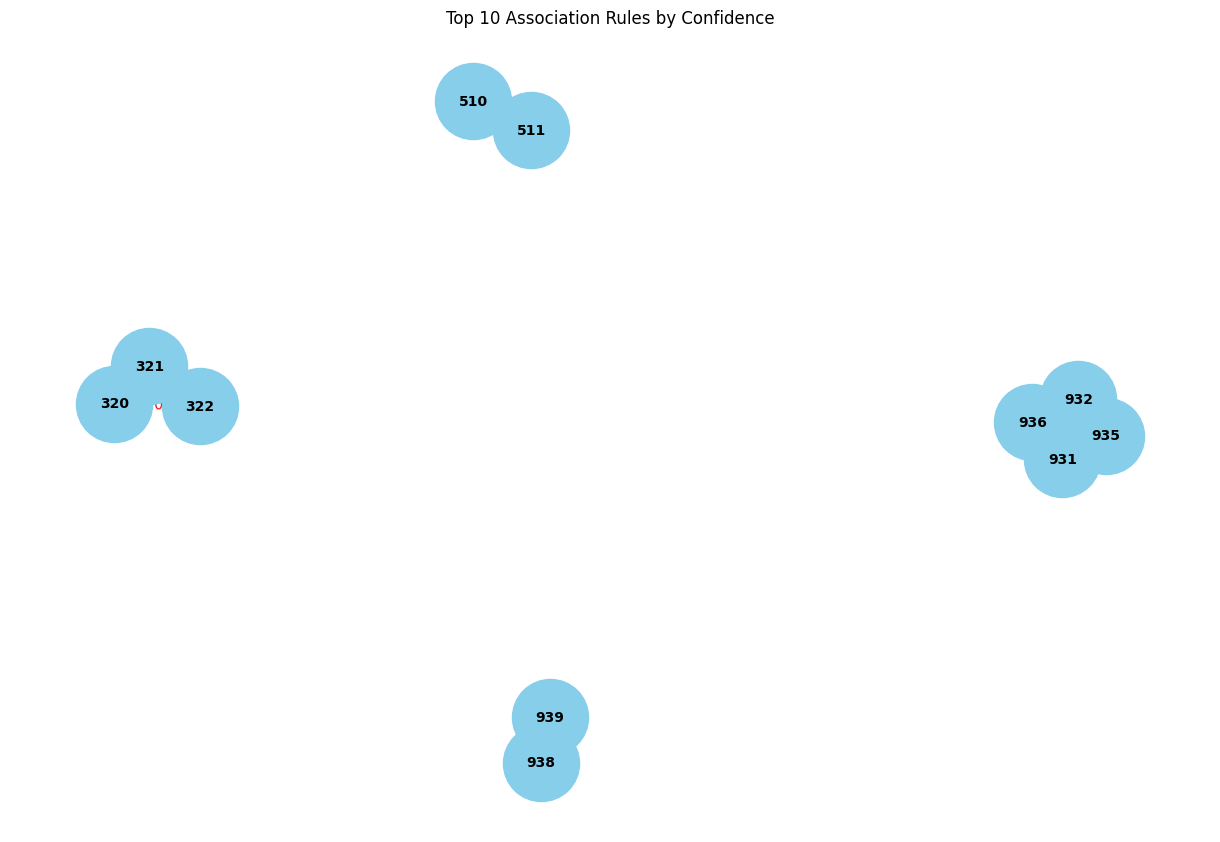

In [21]:
import networkx as nx

# Visualize the association rules as a network graph
def plot_association_rules(rules, top_n=10):
    rules = rules.sort_values(by='confidence', ascending=False).head(top_n)
    
    G = nx.DiGraph()

    for i, rule in rules.iterrows():
        for antecedent in rule['antecedents']:
            for consequent in rule['consequents']:
                G.add_edge(antecedent, consequent, weight=rule['confidence'])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
    edge_labels = {(rule[0], rule[1]): f'{rule[2]:.2f}' for rule in G.edges(data='weight')}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title(f'Top {top_n} Association Rules by Confidence')
    plt.show()

plot_association_rules(best_rules)


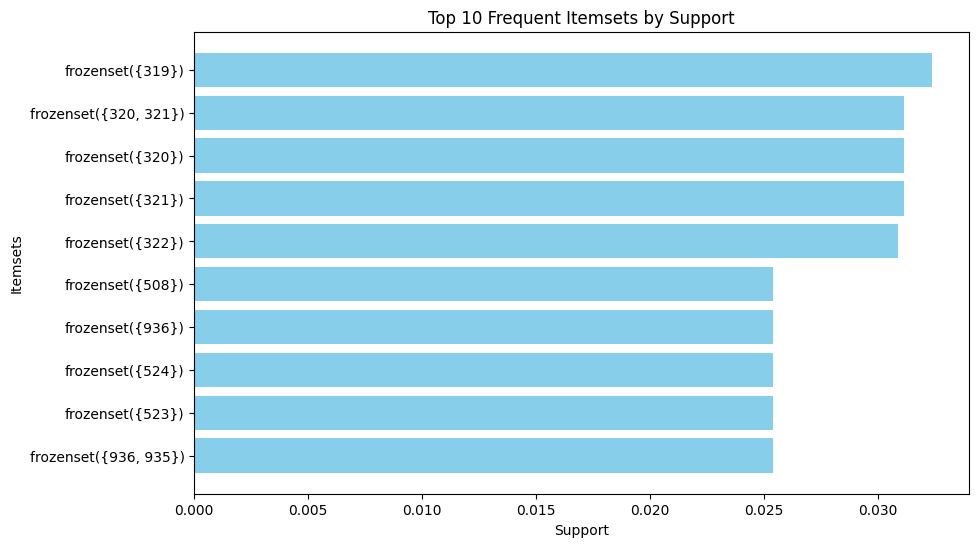

In [22]:
import matplotlib.pyplot as plt

# Visualize the support of the frequent itemsets
def plot_frequent_itemsets(itemsets, top_n=10):
    itemsets = itemsets.sort_values(by='support', ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    plt.barh(itemsets['itemsets'].astype(str), itemsets['support'], color='skyblue')
    plt.xlabel('Support')
    plt.ylabel('Itemsets')
    plt.title(f'Top {top_n} Frequent Itemsets by Support')
    plt.gca().invert_yaxis()
    plt.show()

plot_frequent_itemsets(best_itemsets)


In [10]:


grouped = df_orders.groupby('OrderID')['ProductID'].apply(list).reset_index()


print(grouped.head())

transactions = grouped['ProductID'].tolist()
print("\nTransactions:")
print(transactions)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


def find_best_threshold(encoded_df, thresholds, minconf_threshold=0.7):
    best_threshold = None
    best_itemsets = None
    best_rules = None
    
    for threshold in thresholds:
        frequent_itemsets = apriori(encoded_df, min_support=threshold, use_colnames=True)
        if not frequent_itemsets.empty:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minconf_threshold)
            if not rules.empty:
                best_threshold = threshold
                best_itemsets = frequent_itemsets
                best_rules = rules
                break  
                
    return best_threshold, best_itemsets, best_rules

support_thresholds = [0.005, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]


best_threshold, best_itemsets, best_rules = find_best_threshold(df_encoded, support_thresholds)


if best_threshold is not None:
    print(f"\nBest Support Threshold: {best_threshold}")
    print("\nFrequent Itemsets:")
    print(best_itemsets)
    print("\nAssociation Rules:")
    print(best_rules)
else:
    print("\nNo frequent itemsets found with the given support thresholds.")


   OrderID     ProductID
0    10248  [11, 42, 72]
1    10249      [14, 51]
2    10250  [41, 51, 65]
3    10251  [22, 57, 65]
4    10252  [20, 33, 60]

Transactions:
[[11, 42, 72], [14, 51], [41, 51, 65], [22, 57, 65], [20, 33, 60], [31, 39, 49], [24, 55, 74], [2, 16, 36, 59], [53, 77], [27, 39, 77], [2, 5, 32], [21, 37], [41, 57, 62, 70], [21, 35], [5, 7, 56], [16, 24, 30, 74], [2, 41], [17, 70], [12], [40, 59, 76], [29, 72], [33, 72], [36, 43], [33], [20, 31, 72], [10, 31, 33, 40, 76], [71, 72], [24, 59], [10, 13], [28, 62], [44, 59, 63, 73], [17], [24, 55, 75], [19, 24, 35], [30, 57], [15, 19, 60, 72], [27, 44, 60, 67], [1, 40, 53], [35, 62], [16, 34, 46], [54, 68], [3, 64], [5, 29, 49, 77], [13, 44, 51], [20], [18, 24, 63, 75], [1, 17, 43, 60, 75], [56], [11, 16, 69], [39, 72], [2, 36, 59, 62], [19, 70], [66, 68], [40, 56], [17, 28, 43], [40, 65, 68], [49, 59, 71], [18, 29, 39], [30, 53, 54], [62, 68], [69, 70], [4, 6, 42, 43, 71], [16, 62], [42, 69], [28, 43, 53, 75], [36], [32, 58

### Beschrijving

De code begint met het groeperen van aankopen per aankoop-ID en verzamelt de product-ID's in lijsten. Deze gegroepeerde gegevens worden gecheckt en omgezet in een lijst van transacties. Vervolgens wordt een Transaction Encoder gebruikt om deze transacties te coderen in een binair formaat, wat resulteert in een DataFrame met gecodeerde transacties.

Er wordt een functie gedefinieerd om de beste drempelwaarde voor ondersteuning (support threshold) te vinden. Deze functie doorloopt een reeks van drempelwaarden om de meest frequente itemsets te identificeren met behulp van de Apriori-algoritme. Daarbij wordt ook gekeken naar de bijbehorende associatieregels die voldoen aan een minimale betrouwbaarheidsdrempel (minconf threshold) van 0.7. De functie retourneert de beste gevonden drempelwaarde, de bijbehorende frequente itemsets en de associatieregels.

Na het definiëren van een reeks drempelwaarden, wordt de functie aangeroepen om de beste drempelwaarde te vinden. Als een geschikte drempelwaarde wordt gevonden, worden de frequentste itemsets en de associatieregels afgedrukt. Indien er geen geschikte drempelwaarden gevonden worden, wordt dit ook aangegeven.

Vervolgens wordt er een netwerkdiagram gecreëerd om de associatieregels te visualiseren, waarbij de top associatieregels op basis van vertrouwen worden weergegeven. Daarnaast wordt een staafdiagram gemaakt om de ondersteuning van de meest frequente itemsets te visualiseren.

De code wordt opnieuw uitgevoerd voor een tweede dataset, waarbij de orders per order-ID worden gegroepeerd en de product-ID's worden verzameld in lijsten. Net als in de eerste instantie worden de transacties gecodeerd en wordt dezelfde functie gebruikt om de beste drempelwaarde te vinden voor deze nieuwe dataset. De resultaten worden weer gegeven en de meest relevante associatieregels en frequentste itemsets worden afgedrukt indien gevonden.

### Belang van dit model

Het gebruik van associatieregels met het Apriori-algoritme past goed bij de opdracht omdat het helpt om patronen en verbanden in de aankoopdata van de gefuseerde organisaties te identificeren. Dit model kan waardevolle inzichten bieden in klantgedrag en productcombinaties, wat cruciaal is voor het nemen van strategische beslissingen en het optimaliseren van de voorraad. De begrijpelijkheid en visualiseerbaarheid van de resultaten maken het toegankelijk voor data-analisten bij United Outdoors, terwijl de schaalbaarheid en aanpasbaarheid van het model zorgen voor robuuste en relevante voorspellingen in een snel veranderende markt.